In [1]:
!pip install pydotplus
!pip install make-spirals

# Árboles de decisión

Un **árbol de decisión** es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo de hoja representa el resultado. El nodo superior de un **árbol de decisión** se conoce como nodo raíz. Aprende a particionar en base al valor del atributo. Particiona el árbol de manera recursiva llamada partición recursiva.

El **árbol de decisión** es un algoritmo de ML de tipo caja blanca. Comparte la lógica de toma de decisiones interna, a diferencia de los algoritmos de caja negra como las redes neuronales. Esto quiere decir que los árboles de decisión son **modelos explicativos**.

Su complejidad temporal de entrenamiento es menor en comparación con otros algoritmos clásicos de clasificación. La complejidad temporal de los árboles de decisión depende del número de registros y atributos de los datos dados. El árbol de decisión es un método no paramétrico (también conocido como libre de distribución), por lo que no presuponen una determinada distribución en los datos de entrada para poder funcionar.


## Pseudo-código del algoritmo de árbol de decisión
La idea básica detrás de cualquier algoritmo de árbol de decisión es la siguiente:

1. Seleccionar el mejor atributo utilizando Medidas de selección de atributos (ASM, Attribute Selection Metric en inglés) para dividir los registros.
2. Hacer de ese atributo un nodo de decisión y dividir el conjunto de datos en subconjuntos más pequeños.
3. Comenzar a construir árboles repitiendo este proceso recursivamente para cada nodo hijo hasta que una de las siguientes condiciones se cumpla:

    * Todas las observaciones (filas) se corresponden con el mismo valor de atributo.
    * No quedan más atributos
    * No quedan más filas


## Medidas de selección de atributos
Una medida de selección de atributos es una heurística para seleccionar el criterio de división que divide los datos de la mejor manera posible. También se conoce como reglas de **partición** porque nos ayuda a determinar puntos de ruptura en un nodo dado. Estas medidas proporcionan una puntuación a cada característica (o atributo). El atributo de mejor puntuación se seleccionará como atributo de división.

Las medidas de selección más populares son la ganancia de información (_Information Gain_), y el coeficiente de Gini (_Gini Impurity_).


### Information Gain
[Shannon](https://es.wikipedia.org/wiki/Claude_Elwood_Shannon) inventó el concepto de [entropía](https://es.wikipedia.org/wiki/Entrop%C3%ADa_(informaci%C3%B3n)), que mide la impureza del conjunto de entradas. En física y matemáticas, la entropía se refiere a la aleatoriedad o la impureza en el sistema. En la teoría de la información, se refiere a la impureza en un grupo de muestras. 

La **ganancia de información** es la disminución de la entropía. La ganancia de información calcula la diferencia entre la entropía *antes de la división* y la entropía media *después de la división* del conjunto de datos basada en los valores de atributo dados.

La formulación matemática de esta métrica es la siguiente:

$\begin{eqnarray}
IG(T,a) &=& H(T) - H(T|a) \\
H(T) &=& -\sum_{i\in C}^{}p_i \log_2(p_i) \\
H(T|a) &=& \sum_{j\in vals(a)}^{}\frac{\left | T_j \right |}{\left | T \right |} H(T_j)
\end{eqnarray}$

donde $C$ es el conjunto de clases o etiquetas de nuestro conjunto de datos $T$, $p_i$ es la probabilidad de que una observación (fila) del conjunto de datos pertenezca a la clase $i$, $a$ es una característica (columna) del conjunto de datos y $vals(a)$ son todos los valores que toma la característica $a$.

### Coeficiente de Gini
La impureza de Gini se mide como:

$\begin{eqnarray}Gini(T) = 1 - \sum_{i\in C}^{}p_i^2\end{eqnarray}$

El **coeficiente de Gini** considera una división binaria para cada atributo. Se puede calcular una suma ponderada de la impureza de cada partición. Si una división binaria en las particiones del atributo $a$ divide los datos $T$ en $T_1$ y $T_2$, el coeficiente de Gini de $T$ es:

$\begin{eqnarray}Gini(T|a) = \frac{\left | T_1 \right |}{\left | T \right |}Gini(T_1)+\frac{\left | T_2 \right |}{\left | T \right |}Gini(T_2)\end{eqnarray}$

En el caso de un atributo discreto, el subconjunto que da el coeficiente de Gini más pequeño para el atributo elegido se selecciona como atributo de división. En el caso de los atributos continuos, la estrategia es seleccionar cada par de valores adyacentes como un posible punto de división y el punto con el coeficiente de Gini más pequeño es elegido como punto de división.

El atributo con el coeficiente mínimo de Gini se elige como atributo de división.


## Caso de estudio: clasificación de vinos con árboles de decisión
Vamos a usar el conjunto de datos incluido en `sklearn` sobre [clasificación de vinos](https://scikit-learn.org/stable/datasets/index.html#wine-dataset) para probar los árboles de decisión.

En primer lugar se importan las librerías necesarias:

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.tree import export_graphviz
from sklearn.datasets import make_blobs, make_moons, make_circles

from make_spirals import make_spirals

from six import StringIO  

from IPython.display import Image  

import pydotplus

Cargamos el _dataset_:

In [3]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['Class'])
X.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Hagamos una división rápida del conjunto de datos en entrenamiento y test:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

Entrenamos el modelo usando [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) con el conjunto de entrenamiento:

In [8]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3, random_state=43)
clf = clf.fit(X_train,y_train)

Y evaluamos la calidad de las predicciones del árbol de decisión con el conjunto de test:

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("F1:", metrics.f1_score(y_test, clf.predict(X_test), average='weighted'))

Accuracy: 0.8518518518518519
F1: 0.8542768959435626


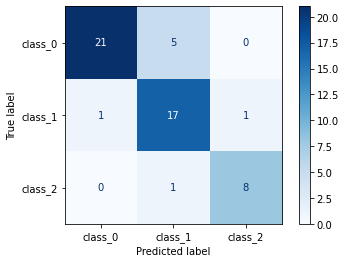

In [10]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=wine.target_names, cmap=plt.cm.Blues)  

Gracias a que los árboles de decisión son un modelo de caja blanca, podemos obtener información muy valiosa sobre cómo realiza las particiones y lo que ello implica.

Vamos a representar gráficamente el árbol de decisión. Para ello convertimos el árbol de decisión en un grafo y lo mostramos por pantalla:

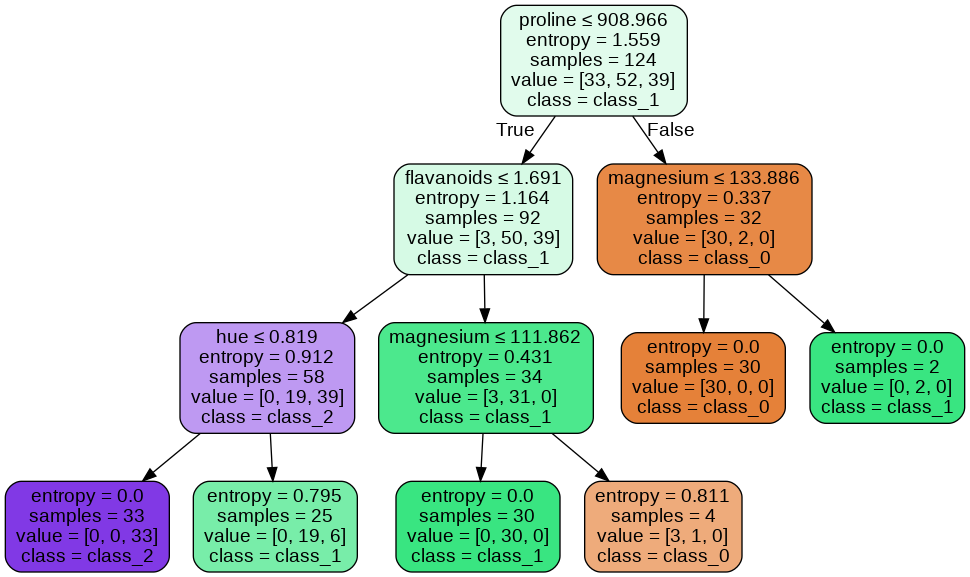

In [12]:
#plt.rcParams["figure.figsize"] = [20, 20]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=wine.feature_names, class_names=wine.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Ajuste de híper-parámetros

Los árboles de decisión tienen múltiples híper-parámetros que podemos (y debemos) ajustar para que ofrezcan un rendimiento óptimo. El más relevante y que va a condicionar en gran medida el desempeño de nuestro clasificador es la **profundidad del árbol** (`max_depth`). Este híper-parámetro define el número de nodos que debe tener el árbol para determinar la clasificación final de la muestra. Árboles muy profundos reportarán mucho *overfitting*. Árboles poco profundos reportarán *underfitting*.

Ilustremos la importancia del `max_depth` con un ejemplo gráfico:

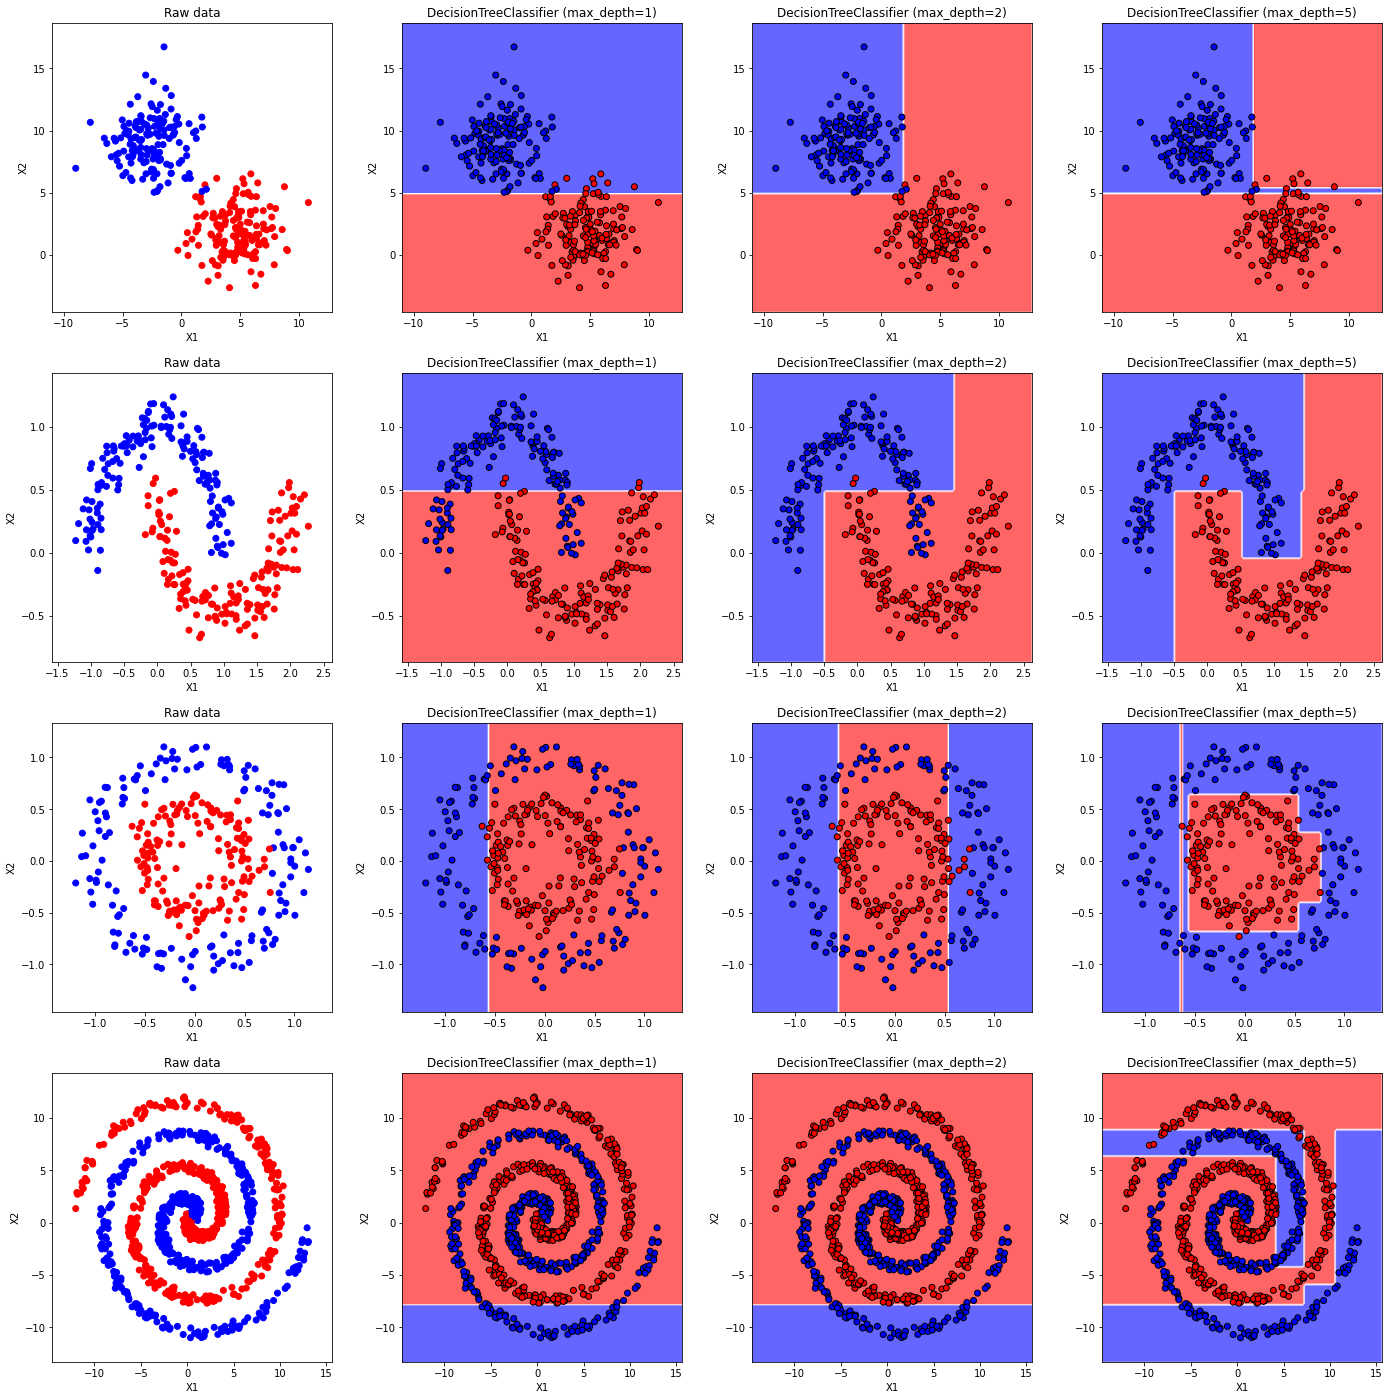

In [16]:
def plot_clasification(X, y, axs):
  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  axs[0].set_title('Raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

  for i, max_depth in enumerate([1,2,5]):    
    axs[i+1].set_title('DecisionTreeClassifier (max_depth=' + str(max_depth) + ')')
    axs[i+1].set_xlabel('X1')
    axs[i+1].set_ylabel('X2')

    axs[i+1].set_xlim(min[0], max[0])
    axs[i+1].set_ylim(min[1], max[1])
    
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=43).fit(X, y)

    xx, yy = np.meshgrid(np.linspace(min[0], max[0], 100), np.linspace(min[1], max[1], 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i+1].contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.7, antialiased=True)
    axs[i+1].scatter(X[:,0], X[:,1], c=y, edgecolor='black', cmap=plt.cm.bwr)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
fig.tight_layout(pad=4.0)

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=2, random_state=42)
plot_clasification(X, y, axs[0])

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
plot_clasification(X, y, axs[1])

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
plot_clasification(X, y, axs[2])

X, y = make_spirals(n_samples=1000, random_state=10)
plot_clasification(X, y, axs[3])

## Árboles de decisión como clasificadores multiclase

Los árboles de decisión pueden trabajar con más de dos clases:

Para ayudar a entender cómo funciona un **árbol de decisión** vamos a generar un conjunto de datos sintético con `make_blobs`. Generamos un *dataset* sintético con 3 clases y 1000 observaciones:

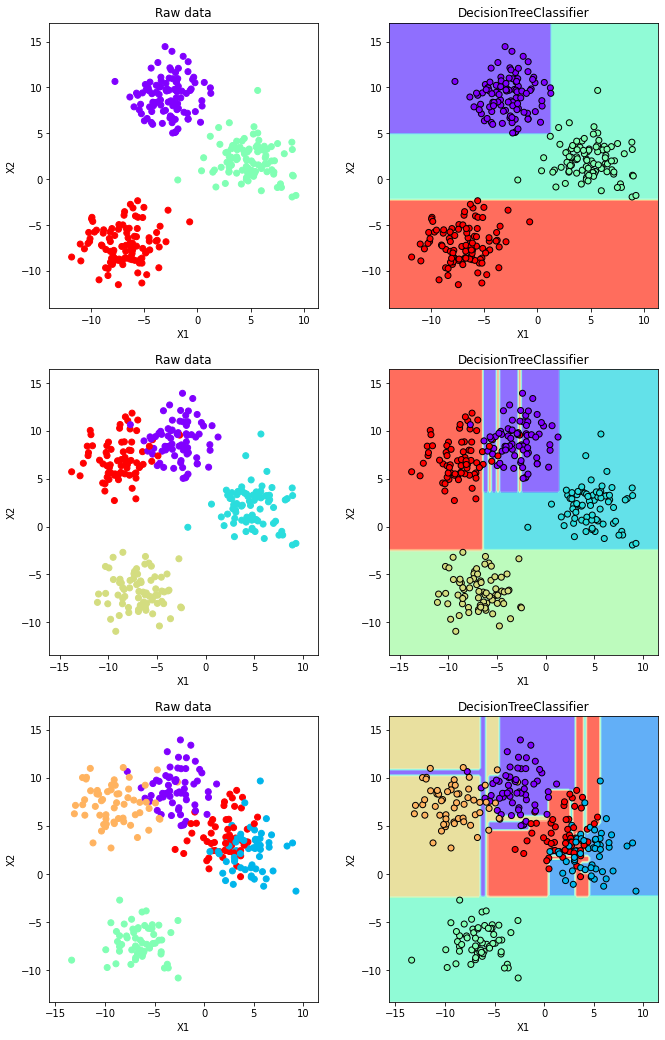

In [19]:
def plot_clasification(X, y, axs):
  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  axs[0].set_title('Raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
  
  axs[1].set_title('DecisionTreeClassifier')
  axs[1].set_xlabel('X1')
  axs[1].set_ylabel('X2')

  axs[1].set_xlim(min[0], max[0])
  axs[1].set_ylim(min[1], max[1])

  clf = DecisionTreeClassifier(random_state=43).fit(X, y)

  xx, yy = np.meshgrid(np.linspace(min[0], max[0], 100), np.linspace(min[1], max[1], 100))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axs[1].contourf(xx, yy, Z, cmap='rainbow', alpha=0.7, antialiased=True)
  axs[1].scatter(X[:,0], X[:,1], c=y, edgecolor='black', cmap='rainbow')

n_centers = [3, 4, 5]    
    
fig, axs = plt.subplots(nrows=len(n_centers), ncols=2, figsize=(10, 5*len(n_centers)))
fig.tight_layout(pad=4.0)

for i, centers in enumerate(n_centers):
    X, y = make_blobs(n_samples=300, n_features=2, centers=centers, cluster_std=2, random_state=42)
    plot_clasification(X, y, axs[i])

---

Creado por **Raúl Lara Cabrera** (raul.lara@upm.es) y **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">